In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds=pd.read_csv("Social_Network_Ads.csv")

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
X=ds.iloc[:,2:4].values
y=ds.iloc[:,4].values

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X=sc_X.fit_transform(X)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression
cls=LogisticRegression()
cls.fit(X_train,y_train)
y_pred=cls.predict(X_test)

### Confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [9]:
cm

array([[57,  1],
       [ 5, 17]], dtype=int64)

### Matplotlib to make Classifier

In [10]:
from matplotlib.colors import ListedColormap
X_set,y_set = X_train,y_train
X1,X2 = np.meshgrid ( np.arange ( start=X_set[:,0].min()-1 , stop=X_set[:,0].max()+1 , step=0.01 ),
                      np.arange ( start=X_set[:,1].min()-1 , stop=X_set[:,1].max()+1 , step=0.01 ))

In [11]:
X1.ravel()

array([-2.87731056, -2.86731056, -2.85731056, ...,  3.11268944,
        3.12268944,  3.13268944])

In [17]:
z=np.array([X1.ravel(),X2.ravel()]).T
z

array([[-2.87731056, -2.60750566],
       [-2.86731056, -2.60750566],
       [-2.85731056, -2.60750566],
       ...,
       [ 3.11268944,  3.35249434],
       [ 3.12268944,  3.35249434],
       [ 3.13268944,  3.35249434]])

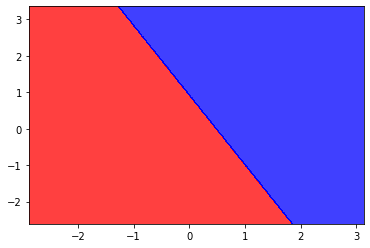

In [24]:
plt.contourf(X1, X2, cls.predict(z).reshape(X1.shape), alpha=0.75,
                                                         cmap=ListedColormap(
                                                             ('red', 'blue')))

(-2.6075056615492507, 3.3524943384506223)

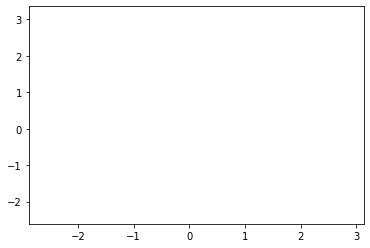

In [26]:
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


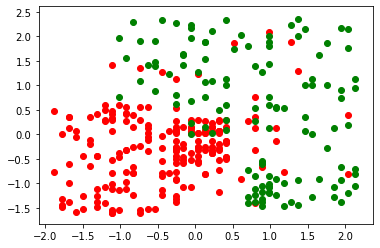

In [32]:
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c=ListedColormap(('red','green'))(i),label=j)

print("Where y_set == 0: Boolean mask.")
print(y_set == 0)
print()

print("All rows of X_set indexed by the Boolean mask")
print(X_set[y_set == 0])
print()

print("2D indexing to get only the first column of the above")
print(X_set[y_set == 0, 0])
print()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


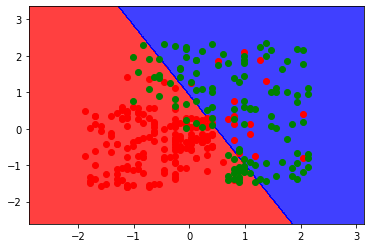

In [34]:
plt.contourf(X1, X2, cls.predict(z).reshape(X1.shape), alpha=0.75,
                                                         cmap=ListedColormap(
                                                             ('red', 'blue')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c=ListedColormap(('red','green'))(i),label=j)

plt.show()